In [1]:
using LinearAlgebra
using LinearSolve
using SpecialMatrices
using Plots
using MAT

## Problema 1

Considere la matriz de segundas diferencias $A$ definida por 
$$a_{ij}=\left\{\begin{array}{cl}
-2, & i=j,\\
1, & |j-i|=1,\\
0, & |j-i|>1.
\end{array} \right.$$
Considere tambien la matriz de Frank de dimension $n\times n$, 
$$
A=\left(\begin{array}{cccccccccc}
n & n-1 & n-2 & n-3 & n-4& \dots 1\\
n-1 & n-1 &n-2 &n-3 & n-4 &\dots 1\\
0 & n-2 & n-2 & n-3 & n-4 & \dots 1\\
0&0&n-3 &n-3 & n-4&\dots 1 \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right)
$$

Note que en la diagonal principal, es decir, la diagonal 0 tenemos los números $n,n-1,\dots,1$, en la diagonal $1$ y $-1$ tenemos $n-1,n-2,\dots,1$. En la diagonal $k>1$ tenemos $n-k,n-k-1,\dots,1$ y en la diagonal $-k$ con $k>1$ tenemos entradas nulas. Esta matriz es un ejemplo de matriz de Hessenberg. 



1.   Que propiedades puede listar de las matrices de segundas diferencias y de Frank
2.   Investigue como medir el tiempo de ejecución de un comando en python o MatLab y 
calcule el tiempo de resolver un sistema  $Ax=b$ con $A$ una matriz de 
 segundas diferencias de segundo orden de dimension $n=2,4,8,1,32,64,128,\dots$. Tome  $b=(1,1,\dots,1)^T.$
3. Repita con la matriz de Frank.
4. Repita con la matriz de Hilbert.

### Solución


**1.** Respecto a la matriz de segundas diferencias, se puede escribir dada su definición como 

$$
A=\left(\begin{array}{cccccccccc}
-2 & 1 & 0 & 0 & 0 & \dots \\
1 & -2 & 1 & 0 & 0 &\dots \\
0 & 1 & -2 & 1 & 0 & \dots\\
0&0& 1 & -2 & 1&\dots  \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right),
$$

y se puede notar que es diagonal dominante (no estrictamente) ya que $|a_{ii}|\geq \sum_{j\neq i}|a_{ij}|$, segundo, se puede notar que es definida negativa, para ver esto usando un teorema visto en clase "*Si* $A$ *es definida positiva y* $B$ *tiene rango completo entonces* $B^{T}AB$ *es positiva definida.*" (Lineales 1, pg 20) se define la matriz de rango completo $B$ 

$$
B=\left(\begin{array}{cccccccccc}
1 & 0& 0 & 0 & 0 & \dots \\
-1 & 1 & 0 & 0 & 0 &\dots \\
0 & -1 & 1 &0 & 0 & \dots\\
0 & 0 & -1 & 1 & 0&\dots  \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right),
$$

esta es de rango completo ya que como se puede ver sus filas son linealmente independientes, luego notese que $-A=B^{T}B=B^{T}IB$, y dado que la matriz identidad es definida positiva entonces $-A$ es definida positiva, es decir para $x\neq0$ $x^{t}(-A){x}=-x^{t}A{x}>0$, lo que implica que $x^{t}A{x}<0$, es decir $A$ es definida negativa. Adicinoalmente a la segunda fila de $A$ se le aplica la operación $R_{2}\to \frac{1}{2}(2R_{2}+R_{1})$, y con ese resultado a la tercer fila se le aplica $R_{3}\to \frac{2}{3}(\frac{3}{2}R_{3}+R_{2})$, y a su vez con este a la cuarta fila $R_{4}\to \frac{3}{4}(\frac{4}{3}R_{4}+R_{3})$, es decir si en general de forma sucesiva se realiza la operación entre filas $R_{i+1}\to \frac{i}{i+1}(\frac{i+1}{n}R_{i+1}+R_{i})$ se obtendra al final una reducción de la forma
$$
A=\left(\begin{array}{cccccccccc}
-2 & 1 &0 & 0 & 0& \dots \\
0 & -3/2 &1 &0 & 0 &\dots \\
0 & 0 & -4/3 & 1 & 0 & \dots \\
0&0&0 &-5/4 & 1&\dots  \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots \\
\dots& \dots&\dots &\dots &\dots &-6/5
\end{array}\right),
$$

y de aquí se puede notar que al ser una matriz triangular superior el determinante sera el producto de la diagonal, es decir $det(A)=(-1)^{n}(n+1)$.

Ahora, para la matriz de Frank si se hace una operación entre filas de la forma $R_{2}\to R_{2}-\frac{n-1}{n}R_{1}$ y $R_{i}\to R_{i}-\frac{(n-i+3)(n-i+1)}{n-i+2}R_{i-1}$ para $3\leq i \leq n$ se obtiene una reducción de la forma

$$
A=\left(\begin{array}{cccccccccc}
n & n-1 & n-2 & n-3 & n-4& \dots 1\\
0 & n-1/n &n-2/n &n-3/n & n-4/n &\dots 1/n\\
0 & 0 & n-2/n-1 & n-3/n-1 & n-4/n-1 & \dots 1/n-1\\
0&0&0 &n-3/n-2 & n-4/n-2&\dots 1/n-2 \\
\vdots& \ddots&\ddots &\ddots &\ddots &\dots
\end{array}\right)
$$

Al tenerla como matriz triangular su determinante será el producto de la diagonal, es decir $det(A)=n\cdot\frac{n-1}{n}\frac{n-2}{n-1}\frac{n-3}{n-2}\dots\frac{2}{3}\frac{1}{2}\cdot1=1$, es decir el determinante de una matriz de Frank siempre será 1.

**2.** Usando el siguiente código



In [2]:
#Segundas diferencias
function SecDif(n)
#Llenado matriz de segundas diferencias
A=zeros(n,n)
for i=1:n
    for j=1:n
       if i==j
            A[i,j]=-2
       elseif abs(i-j)==1
            A[i,j]=1
       else
            A[i,j]=0
       end
        j=j+1
    end
    i=i+1
end
#definicion de b
b=ones(n)
#solve
@time begin
prob = LinearProblem(A, b)
linsolve = init(prob)
sol1 = solve(linsolve)
end
    return nothing
end

SecDif (generic function with 1 method)

El tiempo de ejecución para resolver el sistema con la matriz de segundas diferencias de tamaños $n=2,4,8,16,32,64,128,256,512$ y $1024$ con el paquete *LinearSolve* respectivamente es

In [5]:
SecDif(2);SecDif(4);SecDif(8);SecDif(16);SecDif(32);SecDif(64);SecDif(128);SecDif(256);SecDif(512);SecDif(1024)

  0.000032 seconds (18 allocations: 1.516 KiB)
  0.000025 seconds (18 allocations: 1.656 KiB)
  0.000053 seconds (18 allocations: 2.125 KiB)
  0.000039 seconds (20 allocations: 4.016 KiB)
  0.000045 seconds (20 allocations: 10.438 KiB)
  0.000188 seconds (23 allocations: 35.141 KiB)
  0.000375 seconds (23 allocations: 132.641 KiB)
  0.002039 seconds (23 allocations: 519.828 KiB)
  0.013213 seconds (21 allocations: 2.013 MiB)
  0.050966 seconds (21 allocations: 8.025 MiB)


**3.** Para la matriz de Frank se implamenta el siguiente código

In [6]:
#FrankMatrix Definition
function frank(::Type{T}, n::Integer, k::Integer) where T
    # Compute the frank matrix
    # type: data type
    # n: the dimension of the matrix
    # k = 0 or 1: k = 1 reflect about the anti-diagonal
    p = T[n:-1:1;];
    F = triu(ones(T, n, 1)*p') + diagm(-1 => p[2:n]);
    k == 0 ?  F :
    k == 1 ?  F[n:-1:1,n:-1:1]' : error("k = 0 or 1, but get ", k)
end
frank(::Type{T}, n::Integer) where T = frank(T, n, 0)
frank(args...) = frank(Float64, args...)
frank(::Type, args...) = throw(MethodError(frank, Tuple(args)))

#Metodo extraido del paquete MatrixDepot, no se usa el paquete directamente ya que en Julia 1.4 no funciona actualment
#https://github.com/JuliaLinearAlgebra/MatrixDepot.jl/blob/master/src/higham.jl

frank (generic function with 4 methods)

In [7]:
#FrankTime
function FrankTime(n)
    A=frank(n,0)
    #definicion de b
    b=ones(n)
    #solve
    @time begin
    prob = LinearProblem(A, b)
    linsolve = init(prob)
    sol1 = solve(linsolve)
    end
    return nothing
end

FrankTime (generic function with 1 method)

El tiempo de ejecución para resolver el sistema con la matriz de Frank de tamaños $n=2,4,8,16,32,64,128,256,512$ y $1024$ con el paquete *LinearSolve* respectivamente es

In [8]:
FrankTime(2);FrankTime(4);FrankTime(8);FrankTime(16);FrankTime(32);FrankTime(64);FrankTime(128);FrankTime(256);FrankTime(512);FrankTime(1024)

  0.000034 seconds (19 allocations: 1.547 KiB)
  0.000019 seconds (19 allocations: 1.688 KiB)
  0.000013 seconds (19 allocations: 2.156 KiB)
  0.000022 seconds (21 allocations: 4.047 KiB)
  0.000027 seconds (21 allocations: 10.469 KiB)
  0.000054 seconds (24 allocations: 35.172 KiB)
  0.000252 seconds (24 allocations: 132.672 KiB)
  0.002142 seconds (24 allocations: 519.859 KiB)
  0.009358 seconds (22 allocations: 2.013 MiB)
  0.048063 seconds (22 allocations: 8.025 MiB)


**4.** Para la matriz de Hilbert se implamenta el siguiente código

In [9]:
#Hilbert
function Hilb(n)
    A=Hilbert{Float64}(n,n)
    b=ones(n)
#solve
@time begin
prob = LinearProblem(A, b)
linsolve = init(prob)
sol1 = solve(linsolve)
end
    return nothing
end

Hilb (generic function with 1 method)

El tiempo de ejecución para resolver el sistema con la matriz de Hilbert de tamaños $n=2,4,8,16,32,64,128,256,512$ y $1024$ con el paquete *LinearSolve* respectivamente es

In [10]:
Hilb(2);Hilb(4);Hilb(8);Hilb(16);Hilb(32);Hilb(64);Hilb(128);Hilb(256);Hilb(512);Hilb(1024)

  3.743998 seconds (4.67 M allocations: 235.340 MiB, 2.38% gc time, 99.94% compilation time)
  0.000047 seconds (52 allocations: 4.234 KiB)
  0.000034 seconds (61 allocations: 6.688 KiB)
  0.000156 seconds (77 allocations: 13.125 KiB)
  0.000286 seconds (85 allocations: 22.594 KiB)
  0.001067 seconds (85 allocations: 33.375 KiB)
  0.002201 seconds (85 allocations: 56.375 KiB)
  0.009789 seconds (85 allocations: 105.250 KiB)
  0.050692 seconds (132 allocations: 210.828 KiB)
  0.207962 seconds (134 allocations: 415.078 KiB)


Al realizar el mismo procedimiento con las 3 matrices es posible ver como el tiempo de ejecución para ninguna de ellas supera los 0.2 segundos, aún para matrices $1024\times1024$, las cuales almacenan hasta 8.3 MB.

## Problema 2
Considere la matriz de Hilbert $H(n)$ con $n=4,5,6,\dots$.


1.   Para $n=5,6,7,\dots$ calcule $\lambda(n)$ el menor valor propio de $H(n)$. Grafique $\lambda$ como funcion de $n$.
2.   Al intentar hacer a factorización de Cholesky de $H(20)$ en Julia/Octave/Matlab/Python la factorización no se calcula llevando a la conclución de que la representación numérica de $H(20)$ no es definida positiva. En Octave parece el error 
```
# error: chol : imput matrix must be positive definite
```
Verifique teoricamente  $H(n)$ es en realidad positiva definida (no necesita mostrar detalles aqui). Con ayuda del gráfico anterior y de lo estudiado sobre artimética de punto flotante explique esta situación.
3. Calcule $R(n)$ de la factorización de Cholesky de $H(n)=R(n)^TR(n)$ con $n=14,15,\dots,20$. Presente un gráfico de $t(n)=tr(R(n))$ como evidencia del cálculo.

### Solución

1. Obtengamos los minimos valores propios y grafiquemoslos en forma semilogaritmica

n=5 y con valor propio 3.2879287721800103e-6
n=6 y con valor propio 1.0827994849281602e-7
n=7 y con valor propio 3.493898663754808e-9
n=8 y con valor propio 1.1115391881094101e-10
n=9 y con valor propio 3.499735263291949e-12
n=10 y con valor propio 1.0930663626039906e-13
n=11 y con valor propio 3.3660943718327975e-15


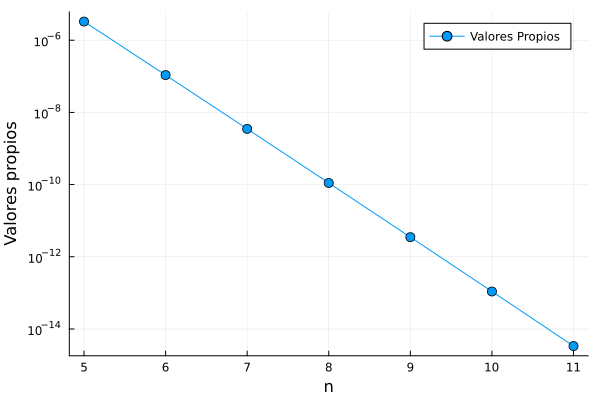

In [11]:
N=11
min_ev=zeros(N-4)
n_value=zeros(N-4)
for n=5:N
    n_value[n-4]=n 
    data=eigen(Hilbert{Float64}(n,n))
    min_ev[n-4]=min(data.values...)
    println("n=",n," y con valor propio ", min_ev[n-4])
end
plot(n_value,min_ev,label="Valores Propios",yaxis=:log,marker=(:circle,5),xlabel="n",ylabel="Valores propios")

2. Veamos que pasa al intentar hacer la factorización de Cholesky de $H(20)$

In [12]:
A=Hilbert{Float64}(20,20)
cholA=cholesky(A)

LoadError: PosDefException: matrix is not positive definite; Cholesky factorization failed.

Si partimos de la definición integral de la matriz de Hilbert
$$
\int_{0}^1 x^{i+j-2} dx=H_{ij}
$$
Entonces, para un vector arbitrario $x$
$$
x^T Hx=\int_{0}^1 \sum_{i=1}^{n} \sum_{j=1}^{n}x_ix_j t^{i+j-2}dt
$$
$$
x^T Hx=\int_{0}^1 \sum_{i=1}^{n} \sum_{j=1}^{n}x_ix_j t^{i-1}t^{j-1}dt=\int_{0}^1 \sum_{i=1}^{n} x_it^{i-1} \sum_{j=1}^{n}x_j t^{j-1}dt
$$
Dado que los indices i y j de las sumas son mudos, entonces e realidad es la misma suma, por tanto
$$
x^THx=\int_{0}^1 \Big(\sum_{i=1}^{n} x_it^{i-1}\Big)^2 dt>0
$$
Por lo que es definida positiva.
No obstante si calculamos el mínimos autovalor de de $H(20)$ nos da

In [13]:
min(eigen(Hilbert{Float64}(20,20)).values...)

-8.595342038368048e-18

A través del gráfico anterior podemos ver que los autovalores en función del tamaño de la matriz de Hilbert disminuyen en forma potencial ($\lambda \propto 10^{-\alpha n}$ con $\alpha>0$), por lo cual en algún punto el valor disminuye hasta que el redondeo que hace la máquina es igual a cero o en algunas casos como el mostrado anteriormente es un valor negativo, dado esto la máquina interpreta que la matriz no es definida positiva.

3. Dado que no podemos usar los algoritmos implementados en Julia, podemos calcular la factorización a través de métodos iterativos

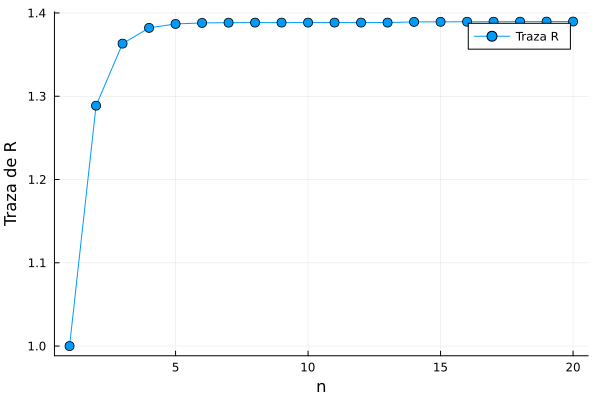

In [14]:
trazas=zeros(20)
n_vec=zeros(20)
for i=1:13
    n_vec[i]=i
    A=Hilbert{Float64}(i,i)
    ChA=cholesky(A)
    trazas[i]=tr(ChA.L) 
end
for n=14:20
    n_vec[n]=n
    A=Hilbert{Float64}(n,n)
    A1=A+(Matrix{Float64}(I,n,n))*0.000000001
    CH=cholesky(A1)
    trazas[n]=tr(CH.L)  
end
plot(n_vec,trazas,label="Traza R",marker=(:circle,5),xlabel="n",ylabel="Traza de R")

## Problema 3

Considere la matriz de Hilbert $H(n)$ con $n=4,5,\dots,20$. Existe una fórmula exacta para la inversa de $H(n)$, implemente esta fórmula. Con el comando de MatLab o Python para calcular la inversa calcule $G=\mbox{inv}(H(n))$. Compare y comente los resultados.

### Solución

Recordemos que la fórmula para la inversa de la matriz de Hilbert es

$$
(H^{-1})_{ij}=(-1)^{i+j}(i+j-1){n+i-1 \choose n-j}{n+j-1 \choose n-i}{i+j-2 \choose i-1}^2.
$$

Al implementarla

In [15]:
function Hilb_inv(n)
    H=Hilbert{Float64}(n,n)
    Hinv=zeros(n,n)
    for i=1:n
        for j=1:n
            Hinv[i,j]=(-1)^(i+j)*(i+j-1)*binomial(n+i-1,n-j)*binomial(n+j-1,n-i)*(binomial(i+j-2,i-1))^2
        end
    end
    return Hinv
end

Hilb_inv (generic function with 1 method)

In [16]:
   dif=(Hilb_inv(20)-inv(Hilbert{Float64}(20,20)))
   println(dif)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0

Como se puede ver la diferencia entre implementar la fórmula y calcular la inversa con el algoritmo dado por Julia no difieren, esto se debe a que probablemente el algoritmo implementado en Julia interprete que debe usar esa fórmula, muestra de ello es que si calculamos la inversa de $H(35)$ con el método implementado a tráves de la fórmula y con el método de Julia nos da el mismo error
```
# OverflowError: binomial(67, 34) overflows.
```
Sin embargo, si lo hiciemos en otros lenguajes de programación con una implementación génerica para hallar las inversas a tráves de algoritmos que son el mismo independiente de la matriz veriamos que a partir de cierto valor de $n$ el error introducido por las múltiples operaciones hechas realizaria que empiecen a aparecer valores que difieren del valor producido por la fórmula, esto se debe a que la mariz de Hilbert está mal condicionada.

In [17]:
Hilb_inv(35)

LoadError: OverflowError: binomial(67, 34) overflows

In [18]:
inv(Hilbert{Float64}(35,35))

OverflowError: OverflowError: binomial(67, 34) overflows

## Problema 4

Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. El archivo .mat puede ser recuperado de 
https://suitesparse-collection-website.herokuapp.com/mat/Sandia/oscil_dcop_21.mat .
Gráfique el patrón de dispersión de esta matriz. Liste (con justificación numérica) las propiedades de esta matriz. 

In [19]:
file = matopen("oscil_dcop_21.mat")
foo=read(file, "Problem") 
close(file)

In [20]:
var=["A"]
DD=get.([foo],var,"A")
M=DD[1]

430×430 SparseArrays.SparseMatrixCSC{Float64, Int64} with 1544 stored entries:
⣛⢘⠧⠷⢀⡀⠀⠀⢀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⢭⡇⠛⢄⠁⠹⢤⣀⠘⢗⢤⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠰⣇⡀⠛⢄⠀⠈⠱⣈⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⢳⡤⡀⠱⣄⠉⠈⢱⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠰⢶⢄⡑⢢⡃⠀⣱⢞⢰⠋⠣⠀⠀⠀⠀⠀⠀⠓⠢⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠓⠂⠀⠑⠲⡴⠒⠑⢄⡈⠈⡄⠄⠠⢀⢀⠘⠀⠈⠜⠆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠉⠂⡂⠈⠑⢄⣄⠀⠀⠀⠀⠁⡶⢢⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠍⠀⠙⢑⣴⡢⠀⠀⠀⡀⠀⢄⠀⠀⣒⢶⣤⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢂⠀⠀⠈⠊⠑⣤⣄⠀⠀⠀⡐⠐⠘⠀⠃⠂⠉⠙⢠⡦⣤⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⢤⠀⣀⠐⠄⠀⠀⠀⠀⠙⠛⢄⠁⠀⡘⠀⠂⠀⠀⠀⠀⠀⠂⠐⠑⠈⠙⠳⢤⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠈⢢⡀⠀⠸⣋⠀⠈⠀⠀⠁⠀⠑⣤⡜⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⢁⣟⠶
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠲⠅⠀⠘⠀⠑⢐⠈⠒⠈⠲⢭⠑⢄⠒⠂⠀⠀⠐⠂⠒⠀⠀⠀⠒⠀⠈⠚⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⢠⠒⠀⠈⠀⠀⠀⠸⠀⠱⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣷⠩⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣇⠀⠀⠀⠀⠀⠰⠀⠀⠀⠀⠈⠻⢆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⡶⢈⠀⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠻⣦⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢿⡑⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠱⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⠀⠀⢷⡀⠀⠀⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠑⣤⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠓⠄⢐⣢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠱⣦⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢻⡝⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠱⣦

In [21]:
print("Rango de la matriz: ",rank(M),"\n")
print("Norma subordinada de la matriz: ",norm(M,Inf),"\n")
print("Mínimo autovalor: ",min(eigen(A).values...),"\n")
print("¿Es simétrica? ", issymmetric(M),", y por tanto tampoco es definida positiva, por lo que no perimte factorización de Cholesky")

Rango de la matriz: 424
Norma subordinada de la matriz: 1.002006574622e6
Mínimo autovalor: -8.595342038368048e-18
¿Es simétrica? false, y por tanto tampoco es definida positiva, por lo que no perimte factorización de Cholesky

# Problema 5

Considere la matriz en https://suitesparse-collection-website.herokuapp.com/Sandia/oscil_dcop_21. Use un método iterativo (diferente de Jacobi) para resolver el sistema $Ax=b$
con $b=(1,1,\dots,1)$. 

### Solución

In [49]:
function Gauss_Seidel(A,b,tol,Niter,n)
    x=0.05*ones(n)
    for m=1:Niter
        if norm(A*x-b,2)<=tol
            return x
        end
        for i=1:n
            z=0
            for j=1:n
                if j != i
                    z=z+A[i,j]*x[j]
                end
            end
                x[i]=(b[i]-z)/A[i,i]
        end
    end
    return x
end

Gauss_Seidel (generic function with 1 method)

In [ ]:
b=ones(430)
Gauss_Seidel(M,b,1e-8,10,430)

Podemos ver que a partir del método de Gauss-Seidel no hay convergencia, esto se debe a que está matriz tiene elementos en su diagonal que son 0, por lo que al en cierto punto deja de ser posible utilizar el método.

In [53]:
M[7,7]

0.0

## Problema 6

Considere la matriz https://suitesparse-collection-website.herokuapp.com/Sybrandt/AGATHA_2015.  Que puede decir del problema asociado a esta matriz? 

### Solución

Primero, es de notar que el problema asociado consta de muchas ecuaciones a resolver, ya que es una matriz cuadrada de 183.964.077 filas y columnas, con 11.588.725.964 entradas no nulas (cerca del $0.000034\%$ de las entradas totales), y a pesar de que no es definida positiva y no es apta para una factorización de Cholesky, es una matriz simétrica, por lo que siempre tendrá una solución única dado cualquier vector $b$, esto dado que una matriz simétrica siempre es diagonlizable.